In [1]:
import spacy
nlp = spacy.load('en_core_web_lg', disable=["parser", "tagger", "ner"])

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
EPS = 1e-6

In [101]:
fun_fact_df = pd.read_csv('../data/til_title.csv')

/Users/danny/Documents/College-CORNELL/04 Senior-MEng/Spring 2019/INFO4300 - Language and Information/final project/fun-fax/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,5,8,9,13,14,15,16,19,21,22,24,27,28,33,34,35,41,46,58,60,62,63,64,65,68,74,79,85,92,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
required_columns = ['title', 'subreddit', 'permalink']
fun_fact_df = fun_fact_df.dropna(axis='rows', subset=required_columns)

In [143]:
banned_subreddits = ['circlejerk', 'ShittyTodayILearned', 'TheOnion']
fun_fact_df = fun_fact_df[~fun_fact_df['subreddit'].isin(banned_subreddits)]

In [144]:
fun_fact_df = fun_fact_df.reset_index(drop=True)

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

In [146]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=.8, ngram_range=(1,1), dtype=np.float32)
titles = fun_fact_df['title']
fun_fact_tfidf = vectorizer.fit_transform(titles)

In [147]:
fun_fact_tfidf

<309065x125402 sparse matrix of type '<class 'numpy.float32'>'
	with 2793174 stored elements in Compressed Sparse Row format>

In [148]:
len(vectorizer.get_feature_names())

125402

In [149]:
len(fun_fact_df['title'])

309065

In [150]:
np.sum(fun_fact_tfidf > 0, axis=1) # shows number of tfidf words per doc

matrix([[ 6],
        [10],
        [26],
        ...,
        [ 4],
        [14],
        [ 5]])

In [151]:
features = vectorizer.get_feature_names()
f_vectors = np.array([nlp.vocab[f].vector for f in features])
weighted_embedding = fun_fact_tfidf.dot(f_vectors)
print(weighted_embedding.shape)

(309065, 300)


In [152]:
n_weighted_embedding = weighted_embedding / (np.linalg.norm(weighted_embedding, axis=1)[:, np.newaxis] + EPS)

In [153]:
print(np.linalg.norm(n_weighted_embedding[22291]))
print(np.linalg.norm(n_weighted_embedding[10493]))

0.9999999
0.9999998


In [480]:
query = "microsoft"
query_tfidf = vectorizer.transform([query])
query_weighted = query_tfidf.dot(f_vectors).flatten()
n_query_weighted = query_weighted / np.linalg.norm(query_weighted)
rankings = n_weighted_embedding.dot(n_query_weighted)
rankings_index = np.argsort(-rankings)
fun_fact_df[["subreddit", "title"]].loc[rankings_index]

,subreddit,title
288823,todayilearned,TIL how Microsoft was named
40548,todayilearned,TIL that the program *Microsoft* Powerpoint was originally made for Macintosh.
168526,todayilearned,TIL 5 tricks for Microsoft Excel
135547,todayilearned,TIL Microsoft Flight Simulator is 3 years older than Microsoft Windows
85817,todayilearned,TIL that Microsoft Office was released for Mac 15 Months before being released on Microsoft Windows
71394,todayilearned,TIL that you can't name a folder 'con' in Microsoft Windows.
167424,todayilearned,TIL In Microsoft Windows you cannot name a folder Con.
276572,reddit.com,TIL...You can't name a folder 'con' in Microsoft windows
193940,todayilearned,TIL Microsoft's CEO is crazy
107685,mildlyinteresting,TIL why Microsoft Excel's logo has an X instead of an E.


In [481]:
query_tfidf.data

array([1.], dtype=float32)

In [482]:
for i in range(20):
    print(rankings[rankings_index[i]], titles[rankings_index[i]])

0.8769067 TIL how Microsoft was named
0.82659763 TIL that the program *Microsoft* Powerpoint was originally made for Macintosh.
0.80883443 TIL 5 tricks for Microsoft Excel
0.8079662 TIL Microsoft Flight Simulator is 3 years older than Microsoft Windows
0.80756795 TIL that Microsoft Office was released for Mac 15 Months before being released on Microsoft Windows
0.79870486 TIL that you can't name a folder 'con' in Microsoft Windows.
0.79870486 TIL In Microsoft Windows you cannot name a folder Con.
0.79870486 TIL...You can't name a folder 'con' in Microsoft windows
0.7986944 TIL Microsoft's CEO is crazy
0.79009145 TIL why Microsoft Excel's logo has an X instead of an E.
0.7891766 TIL Microsoft Office premiered on Mac OS, not Windows.
0.7883165 TIL that you cant name a folder "con" on a  Microsoft Windows computer
0.786859 TIL that Microsoft used pirated software for Windows XP audio files.
0.78068244 TIL - Microsoft just posted their last version of Microsoft Money on the Internet for fr

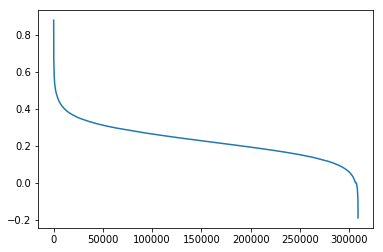

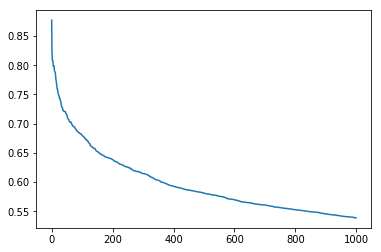

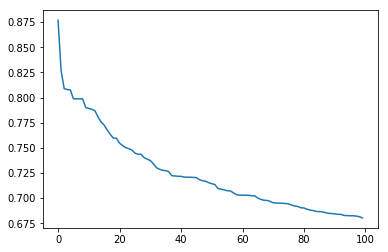

In [483]:
plt.plot(rankings[rankings_index])
plt.show()
plt.plot(rankings[rankings_index[:1000]])
plt.show()
plt.plot(rankings[rankings_index[:100]])
plt.show()

In [484]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [485]:
TOP_HITS_KMEANS = 10
TOP_HITS_KMEANS2 = np.argmax(rankings[rankings_index] < .65)
if TOP_HITS_KMEANS2 < 20:
    TOP_HITS_KMEANS2 = np.argmax(rankings[rankings_index] < .55)
TOP_HITS_KMEANS2 = max(TOP_HITS_KMEANS2, 20)
print("{}-{}, {}-{}".format(0, TOP_HITS_KMEANS, TOP_HITS_KMEANS, TOP_HITS_KMEANS2))
ranked_titles = titles[rankings_index].tolist()
top_ranked_em = n_weighted_embedding[rankings_index]
kmeans = KMeans(n_clusters=3, random_state=0).fit(top_ranked_em[:TOP_HITS_KMEANS])

0-10, 10-155


In [486]:
for i in range(min(20, TOP_HITS_KMEANS)):
    print(kmeans.labels_[i], "{:.4f}".format(rankings[rankings_index[i]]), titles[rankings_index[i]])

0 0.8769 TIL how Microsoft was named
0 0.8266 TIL that the program *Microsoft* Powerpoint was originally made for Macintosh.
2 0.8088 TIL 5 tricks for Microsoft Excel
0 0.8080 TIL Microsoft Flight Simulator is 3 years older than Microsoft Windows
0 0.8076 TIL that Microsoft Office was released for Mac 15 Months before being released on Microsoft Windows
1 0.7987 TIL that you can't name a folder 'con' in Microsoft Windows.
1 0.7987 TIL In Microsoft Windows you cannot name a folder Con.
1 0.7987 TIL...You can't name a folder 'con' in Microsoft windows
2 0.7987 TIL Microsoft's CEO is crazy
2 0.7901 TIL why Microsoft Excel's logo has an X instead of an E.


In [487]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, top_ranked_em[:TOP_HITS_KMEANS])

In [488]:
for c, i in enumerate(closest):
    print(c, ranked_titles[i])

0 TIL that Microsoft Office was released for Mac 15 Months before being released on Microsoft Windows
1 TIL that you can't name a folder 'con' in Microsoft Windows.
2 TIL 5 tricks for Microsoft Excel


In [489]:
kmeans2 = KMeans(n_clusters=7, random_state=0).fit(top_ranked_em[TOP_HITS_KMEANS:TOP_HITS_KMEANS2])
closest2, _ = pairwise_distances_argmin_min(kmeans2.cluster_centers_, top_ranked_em[TOP_HITS_KMEANS:TOP_HITS_KMEANS2])
for c, i in enumerate(closest2):
    print(c, ranked_titles[i + TOP_HITS_KMEANS])

0 TIL Firefox 13 Final Released For Windows, Mac, Linux
1 TIL Microsoft makes more money on Android than Xbox, Windows Phone and Skype combined.
2 TIL that you can't name a folder "con" in Microsoft Windows. Try it!
3 TIL that you can now download Photoshop for free from adobe
4 TIL - Microsoft just posted their last version of Microsoft Money on the Internet for free!
5 TIL people still use windows XP
6 TIL Microsoft is trying to pull some Xbox One crap on Windows 10
